#  House Price Prediction using Linear Regression
This is a simple linear regression model to predict house prices using the Kaggle dataset: *House Prices - Advanced Regression Techniques*.

## 1. Importing the required library.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

## 2. Load the dataset

In [ ]:
df = pd.read_csv('train.csv')  
print(f"✅ Dataset loaded. Shape: {df.shape}")
df.head()

✅ Dataset loaded. Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##  3. Select Features and Target

In [ ]:

features = [
    'OverallQual', 'GrLivArea', 'GarageCars',
    'GarageArea', 'TotalBsmtSF', '1stFlrSF',
    'FullBath', 'YearBuilt'
]
X = df[features]
y = df['SalePrice']
X = X.fillna(X.median())

## 4. Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 5. Train Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 6. Evaluate Model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Evaluation Metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.3f}")

📊 Evaluation Metrics:
RMSE: 39558.88
MAE: 24932.67
R² Score: 0.796


## 7. Visualize Predictions

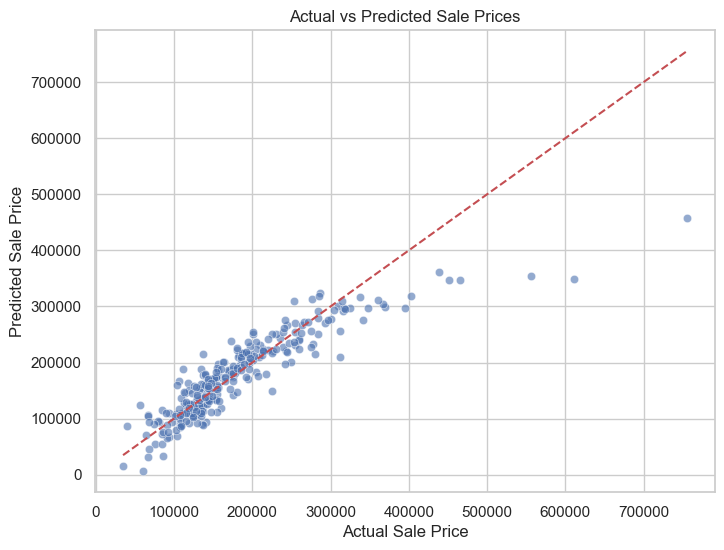

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.show()


## 8. View Feature Coefficients

In [ ]:

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False)

coeff_df

,Feature,Coefficient
0,OverallQual,20926.075291
2,GarageCars,11690.945238
6,FullBath,-5336.676361
7,YearBuilt,360.598440
1,GrLivArea,49.085945
4,TotalBsmtSF,14.359567
5,1stFlrSF,14.153696
3,GarageArea,13.150836
